#Install Required Libraries

In [ ]:
pip install scikit-learn matplotlib gradio

#Fetching Dataset

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)  # convert labels to integers

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
some_digit=X[36002]
some_digit_image = some_digit.reshape(28,28) #Lets reshape it to plot it

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

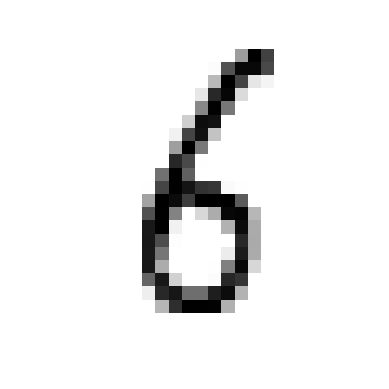

In [ ]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [ ]:
y[36002]

np.uint8(6)

#Split into Training and Test Sets

In [ ]:
# 60,000 for training, 10,000 for testing
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [ ]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#Creating a 2 detector

In [ ]:
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [ ]:
y_train_2

array([False,  True, False, ..., False, False, False])

#Train Classifiers


1. **SGD Classifier (hinge loss = SVM)**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

2. **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#Evaluate Models

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# SGD Evaluation
y_pred_sgd = sgd_clf.predict(X_test)
print("SGD Classifier Accuracy:", accuracy_score(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))

# Random Forest Evaluation
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


SGD Classifier Accuracy: 0.8757
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.96      0.96      1135
           2       0.93      0.80      0.86      1032
           3       0.81      0.90      0.85      1010
           4       0.96      0.85      0.90       982
           5       0.97      0.60      0.74       892
           6       0.93      0.94      0.93       958
           7       0.90      0.92      0.91      1028
           8       0.65      0.91      0.75       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.88      0.88     10000

Random Forest Accuracy: 0.9696
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2   

#Confusion Matrix

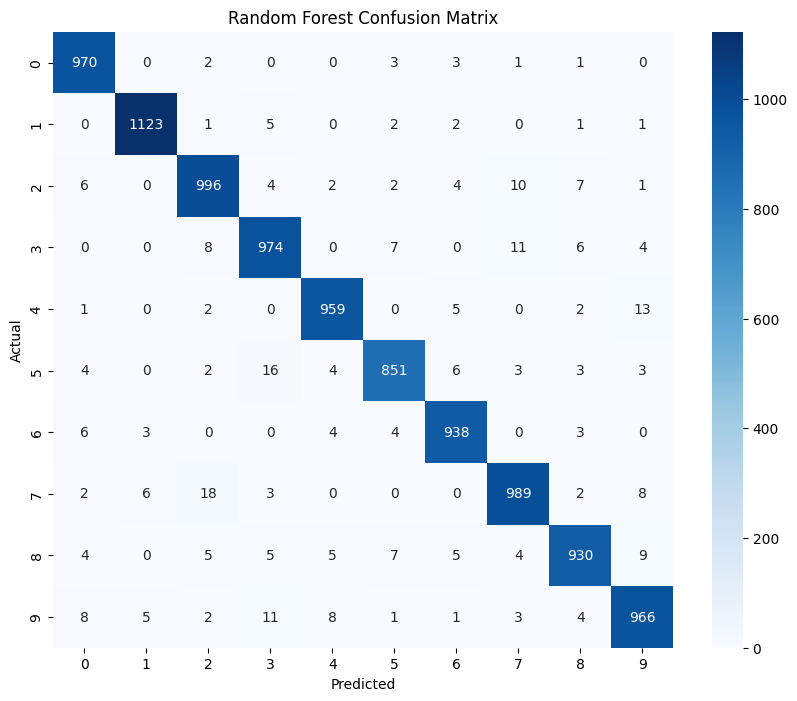

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_mx = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mx, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Visualize Worst Misclassifications

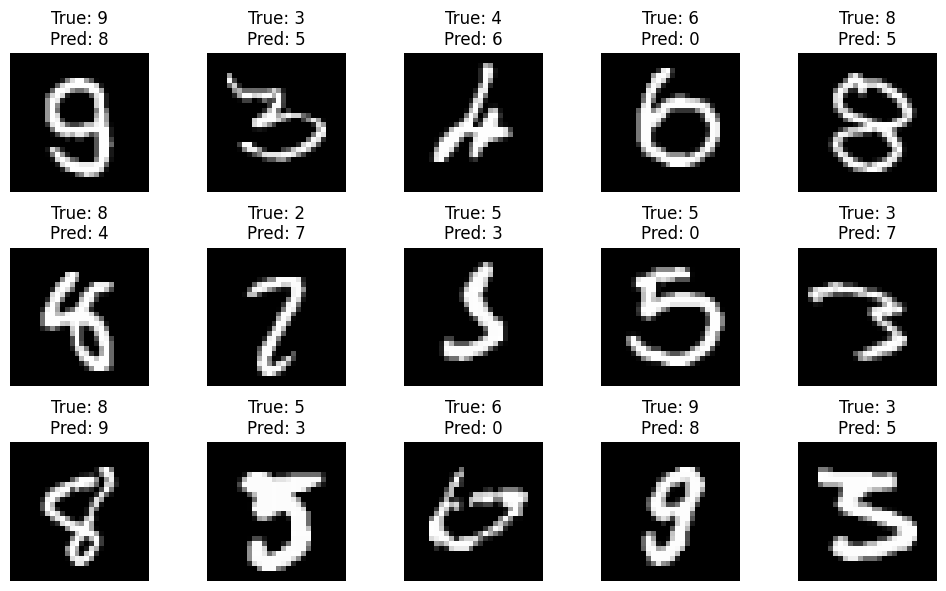

In [ ]:
import matplotlib
def plot_mistakes(X_test, y_test, y_pred):
    wrong = (y_test != y_pred)
    wrong_images = X_test[wrong]
    wrong_actual = y_test[wrong]
    wrong_pred = y_pred[wrong]

    fig, axes = plt.subplots(3, 5, figsize=(10, 6))
    axes = axes.flatten()

    for i in range(15):
        img = wrong_images[i].reshape(28, 28)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"True: {wrong_actual[i]}\nPred: {wrong_pred[i]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

plot_mistakes(X_test, y_test, y_pred_rf)


#Gradio Web App Deployment


In [ ]:
import gradio as gr
import numpy as np

def classify_digit(image):
    image = image.resize((28, 28)).convert("L")  # Resize to 28x28 and convert to grayscale
    image_arr = np.array(image).reshape(1, -1)   # Flatten image to 1D array
    prediction = rf_clf.predict(image_arr)[0]    # Predict using trained classifier
    return f"Predicted Digit: {prediction}"

app = gr.Interface(
    fn=classify_digit,
    inputs=gr.Image(type="pil", image_mode='L'), # Accept PIL image, grayscale mode
    outputs="text",
    title="MNIST Digit Recognizer",
    description="Draw or upload a digit image (28x28 grayscale)"
)

app.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b689f8812e2eaa5f39.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
